### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
df = pd.read_csv('data/coupons.csv')

In [475]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [477]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Finding missing values
missing_values = df.isnull().sum()
# Display missing values count per column
print("Missing values per column:")
print(missing_values)

Missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Value counts for each column
print("\nValue counts per column:")
for column in df.columns:
    print(f"\nColumn {column}:")
    print(df[column].value_counts())


Value counts per column:

Column destination:
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

Column passanger:
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

Column weather:
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

Column temperature:
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

Column time:
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

Column coupon:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

Column expiration:
expiration
1d    7091
2h    5593
Name: count, dtype: int64

Column gender:
gender
Female    6511
Male      6173
Name: count, dtype: int64

Column age:
age
21         2653
26         2559
31         2

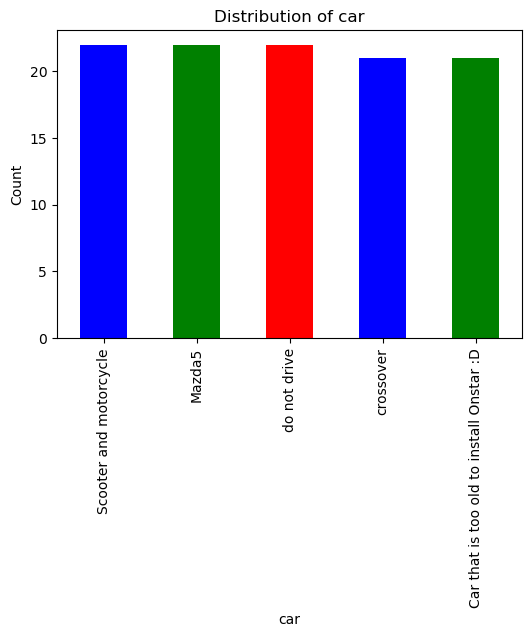

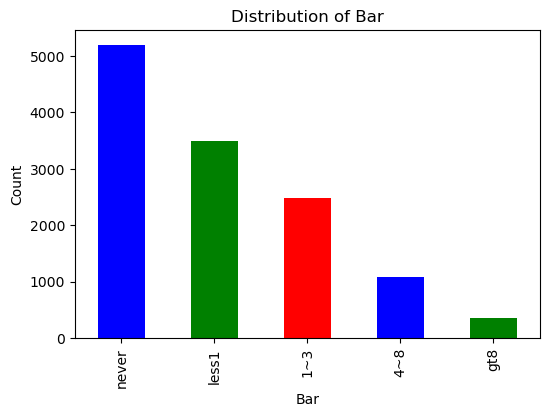

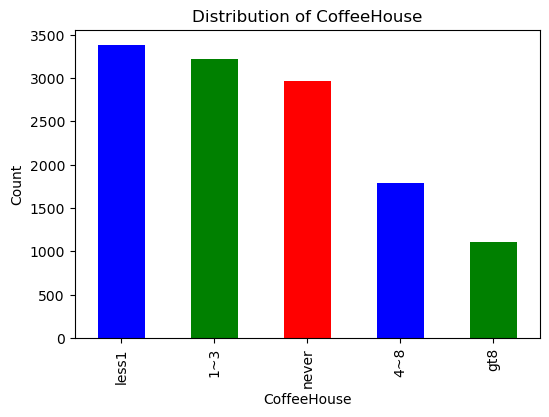

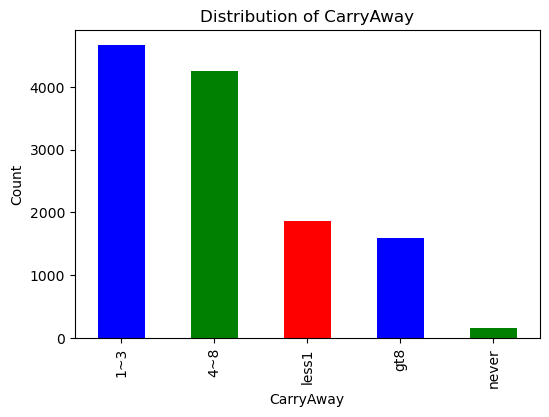

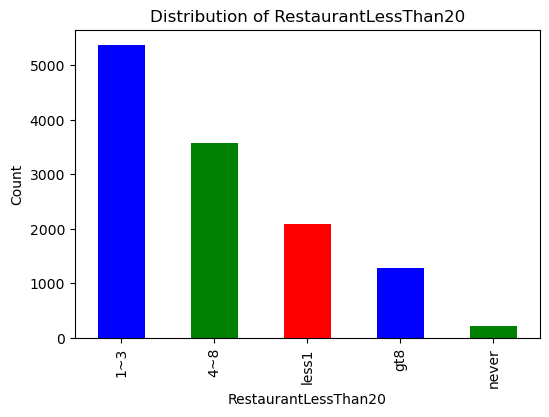

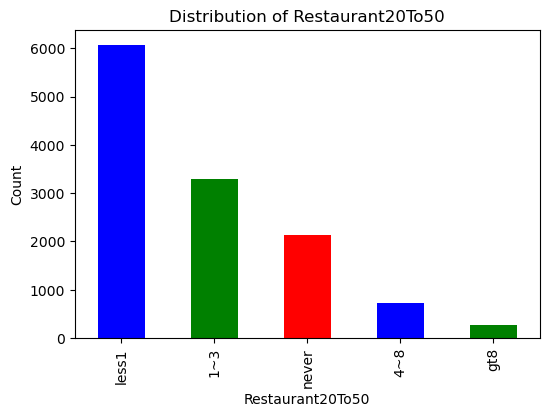

In [35]:
# Function to plot distribution of multiple categorical variables
def plot_selected_categorical_distribution(df, columns):
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(6, 4))
            df[column].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.title(f'Distribution of {column}')
            plt.show()
        else:
            print(f"Column '{column}' not found in DataFrame.")

# Specify all categorical columns to plot at once
selected_columns = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Call the function once for all selected columns
plot_selected_categorical_distribution(df, selected_columns)

In [27]:
# Function to calculate mode
def calculate_mode(series):
    mode_values = series.mode()
    print(f"Mode for {series.name}: {mode_values}")
    return mode_values[0] if not mode_values.empty else None

# Function to fill missing categorical values with mode
def fill_missing_selected_categorical_modes(df, columns):
    df_nomiss = df.copy()
    for column in columns:
        if column in df_nomiss.columns:
            df_nomiss[column] = df_nomiss[column].replace(["", "NaN"], np.nan)  # Handle non-null NaNs
            mode_value = calculate_mode(df_nomiss[column])
            print(f"Filling NaN in {column} with {mode_value}")
            if mode_value is not None:
                df_nomiss[column] = df_nomiss[column].fillna(mode_value)
            else:
                print(f"No valid mode found for '{column}' column.")
        else:
            print(f"Column '{column}' not found in DataFrame.")
    return df_nomiss

# Specify multiple categorical columns to fill at once
selected_categorical_columns = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Fill missing values for all specified columns in one function call
df_nomiss = fill_missing_selected_categorical_modes(df, selected_categorical_columns)

Mode for car: 0                    Mazda5
1    Scooter and motorcycle
2              do not drive
Name: car, dtype: object
Filling NaN in car with Mazda5
Mode for Bar: 0    never
Name: Bar, dtype: object
Filling NaN in Bar with never
Mode for CoffeeHouse: 0    less1
Name: CoffeeHouse, dtype: object
Filling NaN in CoffeeHouse with less1
Mode for CarryAway: 0    1~3
Name: CarryAway, dtype: object
Filling NaN in CarryAway with 1~3
Mode for RestaurantLessThan20: 0    1~3
Name: RestaurantLessThan20, dtype: object
Filling NaN in RestaurantLessThan20 with 1~3
Mode for Restaurant20To50: 0    less1
Name: Restaurant20To50, dtype: object
Filling NaN in Restaurant20To50 with less1


In [37]:
# Checking missing values after filling missing categorical values with mode
missing_values = df_nomiss.isnull().sum()
# Display missing values count per column
print("Missing values per column:")
print(missing_values)

Missing values per column:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [91]:
# Calculate the total number of accepted coupons (Y = 1)
accepted_coupons = df_nomiss[df_nomiss['Y'] == 1].shape[0]

# Calculate the total number of observations
total_observations = df_nomiss.shape[0]

# Proportion of accepted coupons
proportion_accepted = accepted_coupons / total_observations if total_observations > 0 else 0

# Print the result
print(f"Proportion of total observations that accepted the coupon: {proportion_accepted:.2f}")

Proportion of total observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

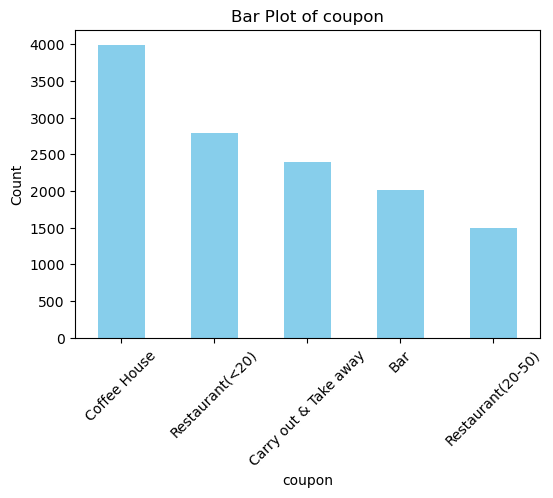

In [49]:
# Function to plot the distribution of a categorical column
def plot_categorical_distribution(df, column):
    if column in df.columns:
        plt.figure(figsize=(6,4))
        df[column].value_counts().plot(kind='bar', color='skyblue')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Bar Plot of {column}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Call the function for the 'coupon' column in df_nomiss
plot_categorical_distribution(df_nomiss, 'coupon')

6. Use a histogram to visualize the temperature column.

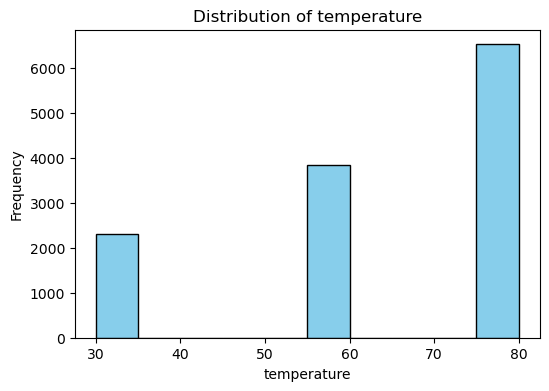

In [83]:
# Function to plot histogram for a numeric column
def plot_numeric_distribution(df, column, bins=10):
    if column in df.columns:
        plt.figure(figsize=(6, 4))
        df[column].plot(kind='hist', bins=bins, color='skyblue', edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Call the function for the 'temperature' column in df_nomiss
plot_numeric_distribution(df_nomiss, 'temperature', bins=10)  

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [87]:
# Create a new DataFrame with just the rows where coupon equals 'Bar'
df_bar_coupons = df_nomiss[df_nomiss['coupon'] == 'Bar']

# Display the new DataFrame
print(df_bar_coupons)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [93]:
# Calculate the total number of accepted coupons (Y = 1) in 'Bar' coupons
accepted_bar_coupons = df_bar_coupons[df_bar_coupons['Y'] == 1].shape[0]

# Calculate the total number of 'Bar' coupons
total_bar_coupons = df_bar_coupons.shape[0]

# Proportion of accepted 'Bar' coupons
proportion_accepted = accepted_bar_coupons / total_bar_coupons if total_bar_coupons > 0 else 0

# Print the result
print(f"Proportion of accepted 'Bar' coupons: {proportion_accepted:.2f}")

Proportion of accepted 'Bar' coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [148]:
# Map 'Bar' values to two categories: Group 1(go to a bar 3 or fewer times a month) and Group 2(go to a bar More than 3 times a month)

df_bar_coupons.loc[:, 'Group'] = df_bar_coupons['Bar'].apply(
    lambda x: 'Group 1' if x in ['never', 'less1', '1~3'] else 'Group 2'
)

# Calculate the acceptance rate (Y = 1) for each group
acceptance_rate = df_bar_coupons.groupby('Group')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates for each group:")
print(acceptance_rate)

# Compare the acceptance rates and print the observation based on the comparison
if acceptance_rate['Group 1'] > acceptance_rate['Group 2']:
    print("\nGroup 1 (drivers who go to a bar 3 or fewer times a month) has a higher acceptance rate.")
elif acceptance_rate['Group 1'] < acceptance_rate['Group 2']:
    print("\nGroup 2 (drivers who go to a bar more than 3 times a month) has a higher acceptance rate.")
else:
    print("\nThe acceptance rates for Group 1 and Group 2 are the same.")

Acceptance rates for each group:
Group
Group 1    0.370737
Group 2    0.768844
Name: Y, dtype: float64

Group 2 (drivers who go to a bar more than 3 times a month) has a higher acceptance rate.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [124]:
# Group 1: Bar visits more than once AND age over 25.
# Group 2: All others (either going to a bar less than once a month or age 25 or younger).

# Grouping based on Bar visits and Age
df_bar_coupons.loc[:, 'Group'] = df_bar_coupons.apply(
    lambda row: 'Group 1' if row['Bar'] in ['1~3', '4~8', 'gt8'] and row['age'] not in ['below21', '21'] else 'Group 2', axis=1
)

# Calculate the acceptance rate (Y = 1) for each group
acceptance_rate = df_bar_coupons.groupby('Group')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates for each group:")
print(acceptance_rate)

# Compare the acceptance rates and print the observation based on the comparison
if acceptance_rate['Group 1'] > acceptance_rate['Group 2']:
    print("\nGroup 1 (drivers who go to a bar more than once a month and are over 25) has a higher acceptance rate.")
elif acceptance_rate['Group 1'] < acceptance_rate['Group 2']:
    print("\nGroup 2 (drivers who never go to a bar or go to a bar less than once a month or age 25 or younger) has a higher acceptance rate.")
else:
    print("\nThe acceptance rates for Group 1 and Group 2 are the same.")

Acceptance rates for each group:
Group
Group 1    0.695238
Group 2    0.335003
Name: Y, dtype: float64

Group 1 (drivers who go to a bar more than once a month and are over 25) has a higher acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [126]:
# Group 1: Drivers who who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
# Group 2: All others.

# Grouping based on Bar visits, Passenger type, and Occupation
df_bar_coupons.loc[:, 'Group'] = df_bar_coupons.apply(
    lambda row: 'Group 1' if row['Bar'] in ['1~3', '4~8', 'gt8'] and row['passanger'] != 'Kid(s)' and row['occupation'] != 'Farming Fishing & Forestry' 
    else 'Group 2', axis=1
)

# Calculate the acceptance rate (Y = 1) for each group
acceptance_rate = df_bar_coupons.groupby('Group')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates for each group:")
print(acceptance_rate)

# Compare the acceptance rates and print the observation based on the comparison
if acceptance_rate['Group 1'] > acceptance_rate['Group 2']:
    print("\nGroup 1 (drivers who go to a bar more than once a month, had passengers who were not kids, and had occupations other than farming, fishing, or forestry) has a higher acceptance rate.")
elif acceptance_rate['Group 1'] < acceptance_rate['Group 2']:
    print("\nGroup 2 (all other drivers) has a higher acceptance rate.")
else:
    print("\nThe acceptance rates for Group 1 and Group 2 are the same.")

Acceptance rates for each group:
Group
Group 1    0.713249
Group 2    0.296044
Name: Y, dtype: float64

Group 1 (drivers who go to a bar more than once a month, had passengers who were not kids, and had occupations other than farming, fishing, or forestry) has a higher acceptance rate.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [128]:
# Grouping drivers based on the specified conditions using Bar, passanger, maritalStatus, age, RestaurantLessThan20, income,

df_bar_coupons.loc[:, 'Group'] = df_bar_coupons.apply(
    lambda row: 'Group 1' if row['Bar'] in ['1~3', '4~8', 'gt8'] and row['passanger'] != 'Kid(s)' and row['maritalStatus'] != 'Widowed' 
    else 'Group 2' if row['Bar'] in ['1~3', '4~8', 'gt8'] and row['age'] in ['below21', '21', '26'] 
    else 'Group 3' if row['RestaurantLessThan20'] in ['4~8', 'gt8'] and row['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
    else 'Other', axis=1
)

# Calculate the acceptance rate (Y = 1) for each group
acceptance_rate = df_bar_coupons.groupby('Group')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates for each group:")
print(acceptance_rate)

# Compare the acceptance rates and print the observation based on the comparison
if acceptance_rate.get('Group 1', 0) > acceptance_rate.get('Group 2', 0) and acceptance_rate.get('Group 1', 0) > acceptance_rate.get('Group 3', 0):
    print("\nGroup 1 (drivers who go to a bar more than once a month, had passengers who were not kids, and were not widowed) has the highest acceptance rate.")
elif acceptance_rate.get('Group 2', 0) > acceptance_rate.get('Group 1', 0) and acceptance_rate.get('Group 2', 0) > acceptance_rate.get('Group 3', 0):
    print("\nGroup 2 (drivers who go to a bar more than once a month and are under the age of 30) has the highest acceptance rate.")
elif acceptance_rate.get('Group 3', 0) > acceptance_rate.get('Group 1', 0) and acceptance_rate.get('Group 3', 0) > acceptance_rate.get('Group 2', 0):
    print("\nGroup 3 (drivers who go to cheap restaurants more than 4 times a month and income is less than $50K) has the highest acceptance rate.")
else:
    print("\nNo group has a significantly higher acceptance rate.")

Acceptance rates for each group:
Group
Group 1    0.713249
Group 2    0.777778
Group 3    0.263889
Other      0.298147
Name: Y, dtype: float64

Group 2 (drivers who go to a bar more than once a month and are under the age of 30) has the highest acceptance rate.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers aged 25 to 30, who visit a bar more than once a month, have passengers who are not kids, and work in occupations other than farming, fishing, or forestry, are more likely to accept the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the CoffeeHouse Coupons**

1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [133]:
# Create a new DataFrame with just the rows where coupon equals 'Coffee House'
df_coffee_coupons = df_nomiss[df_nomiss['coupon'] == 'Coffee House']

# Display the new DataFrame
print(df_coffee_coupons)

           destination  passanger weather  temperature  time        coupon  \
1      No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
3      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
12     No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
15                Home      Alone   Sunny           80   6PM  Coffee House   
...                ...        ...     ...          ...   ...           ...   
12656             Home      Alone   Snowy           30  10PM  Coffee House   
12659             Work      Alone   Snowy           30   7AM  Coffee House   
12674             Home      Alone   Rainy           55  10PM  Coffee House   
12675             Home      Alone   Snowy           30  10PM  Coffee House   
12681             Work      Alone   Snowy           30   7AM  Coffee House   

      expiration  gender age      maritalStatus  ...  Restauran

2. What proportion of Coffee House coupons were accepted?

In [138]:
# Calculate the total number of accepted coupons (Y = 1) in 'Coffee House' coupons
accepted_coffee_coupons = df_coffee_coupons[df_coffee_coupons['Y'] == 1].shape[0]

# Calculate the total number of 'Coffee House' coupons
total_coffee_coupons = df_coffee_coupons.shape[0]

# Proportion of accepted 'Coffee House' coupons
proportion_accepted = accepted_coffee_coupons / total_coffee_coupons if total_coffee_coupons > 0 else 0

# Print the result
print(f"Proportion of accepted 'Coffee House' coupons: {proportion_accepted:.2f}")

Proportion of accepted 'Coffee House' coupons: 0.50


3. Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more.

In [146]:
# Map 'CoffeeHouse' values to two categories: 'go to a Coffee House 3 or fewer times a month' and 'go to a Coffee House More than 3 times a month'
df_coffee_coupons.loc[:, 'Group'] = df_coffee_coupons['CoffeeHouse'].apply(
    lambda x: 'Group 1' if x in ['never', 'less1', '1~3'] else 'Group 2'
)

# Calculate the acceptance rate (Y = 1) for each group
acceptance_rate = df_coffee_coupons.groupby('Group')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates for each group:")
print(acceptance_rate)

# Compare the acceptance rates and print the observation based on the comparison
if acceptance_rate['Group 1'] > acceptance_rate['Group 2']:
    print("\nGroup 1 (drivers who go to a Coffee House 3 or fewer times a month) has a higher acceptance rate.")
elif acceptance_rate['Group 1'] < acceptance_rate['Group 2']:
    print("\nGroup 2 (drivers who go to a Coffee House more than 3 times a month) has a higher acceptance rate.")
else:
    print("\nThe acceptance rates for Group 1 and Group 2 are the same.")

Acceptance rates for each group:
Group
Group 1    0.449615
Group 2    0.675000
Name: Y, dtype: float64

Group 2 (drivers who go to a Coffee House more than 3 times a month) has a higher acceptance rate.


4. Compare the acceptance rate between drivers who are over the age of 25 to the drivers who are 25 or younger. 

In [156]:
# Group 1: age over 25.
# Group 2: age 25 or younger.

# Grouping based on Coffee House visits and Age
df_coffee_coupons.loc[:, 'Group'] = df_coffee_coupons.apply(
    lambda row: 'Group 1' if row['age'] not in ['below21', '21'] else 'Group 2', axis=1
)

# Calculate the acceptance rate (Y = 1) for each group
acceptance_rate = df_coffee_coupons.groupby('Group')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates for each group:")
print(acceptance_rate)

# Compare the acceptance rates and print the observation based on the comparison
if acceptance_rate['Group 1'] > acceptance_rate['Group 2']:
    print("\nGroup 1 (drivers who are over 25) has a higher acceptance rate.")
elif acceptance_rate['Group 1'] < acceptance_rate['Group 2']:
    print("\nGroup 2 (drivers who are 25 or younger) has a higher acceptance rate.")
else:
    print("\nThe acceptance rates for Group 1 and Group 2 are the same.")

Acceptance rates for each group:
Group
Group 1    0.481406
Group 2    0.550096
Name: Y, dtype: float64

Group 2 (drivers who are 25 or younger) has a higher acceptance rate.


5. Compare the acceptance rate between drivers who go to a Coffee House more than once a month and are over the age of 25 to the drivers who go to a Coffee House more than once a month and are 25 or younger.

In [160]:
# Group 1: Coffee House visits more than once AND age over 25.
# Group 2: Coffee House visits more than once AND age 25 or younger.

# Grouping based on Coffee House visits and Age
df_coffee_coupons.loc[:, 'Group'] = df_coffee_coupons.apply(
    lambda row: 'Group 1' if row['CoffeeHouse'] in ['1~3', '4~8', 'gt8'] and row['age'] not in ['below21', '21'] 
    else ('Group 2' if row['CoffeeHouse'] in ['1~3', '4~8', 'gt8'] and row['age'] in ['below21', '21'] else 'Excluded'), axis=1
)


# Calculate the acceptance rate (Y = 1) for each group
acceptance_rate = df_coffee_coupons.groupby('Group')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates for each group:")
print(acceptance_rate)

# Compare the acceptance rates and print the observation based on the comparison
if acceptance_rate['Group 1'] > acceptance_rate['Group 2']:
    print("\nGroup 1 (drivers who go to a Coffee House more than once a month and are over 25) has a higher acceptance rate.")
elif acceptance_rate['Group 1'] < acceptance_rate['Group 2']:
    print("\nGroup 2 (drivers who go to a Coffee House more than once a month and are 25 or younger) has a higher acceptance rate.")
else:
    print("\nThe acceptance rates for Group 1 and Group 2 are the same.")

Acceptance rates for each group:
Group
Excluded    0.350048
Group 1     0.638439
Group 2     0.712766
Name: Y, dtype: float64

Group 2 (drivers who go to a Coffee House more than once a month and are 25 or younger) has a higher acceptance rate.


6. Compare the acceptance rate between the drivers who go to Coffee House more than once a month and had passengers that were friends and the drivers who go to Coffee House more than once a month and had passengers that were not friends.

In [169]:
# Group 1: Coffee House visits more than once and passengers that were friends.
# Group 2: Coffee House visits more than once and passengers that were not friends.

# Grouping based on Coffee House visits and passengers
df_coffee_coupons.loc[:, 'Group'] = df_coffee_coupons.apply(
    lambda row: 'Group 1' if row['CoffeeHouse'] in ['1~3', '4~8', 'gt8'] and row['passanger'] == 'Friend(s)' 
    else ('Group 2' if row['CoffeeHouse'] in ['1~3', '4~8', 'gt8'] and row['passanger'] != 'Friend(s)' else 'Excluded'), axis=1
)


# Calculate the acceptance rate (Y = 1) for each group
acceptance_rate = df_coffee_coupons.groupby('Group')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates for each group:")
print(acceptance_rate)

# Compare the acceptance rates and print the observation based on the comparison
if acceptance_rate['Group 1'] > acceptance_rate['Group 2']:
    print("\nGroup 1 (drivers who go to a Coffee House more than once a month and passengers were friends) has a higher acceptance rate.")
elif acceptance_rate['Group 1'] < acceptance_rate['Group 2']:
    print("\nGroup 2 (drivers who go to a Coffee House more than once a month and passengers were not friends) has a higher acceptance rate.")
else:
    print("\nThe acceptance rates for Group 1 and Group 2 are the same.")


Acceptance rates for each group:
Group
Excluded    0.350048
Group 1     0.763245
Group 2     0.613050
Name: Y, dtype: float64

Group 1 (drivers who go to a Coffee House more than once a month and passengers were friends) has a higher acceptance rate.


7.  Based on these observations, what do you hypothesize about drivers who accepted the Coffee House coupons?

Drivers aged 25 or younger who visit a Coffee House more than once a month and were with friends are more likely to accept the coupon.